<a href="https://colab.research.google.com/github/phuongha47/vinmec_pre/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data

In [1]:
pip install underthesea

     |████████████████████████████████| 7.6 MB 3.2 MB/s 
     |████████████████████████████████| 743 kB 8.4 MB/s 
     |████████████████████████████████| 235 kB 46.5 MB/s 
     |████████████████████████████████| 581 kB 19.4 MB/s 


In [2]:
import pandas as pd
import re
from underthesea import sent_tokenize

In [3]:
df_val = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/test.csv')
df_train = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/val.csv')


In [4]:
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(text):
	for c in text:
		if c in s1:
			 text = text.replace(c,s0[s1.index(c)])
	return text

In [5]:
# for i in range(len(df_train["long_question"])):
#   try: 
#     df_train["long_question"][i] = remove_accents(df_train["long_question"][i])
#   except:
#     print ('') 
# for i in range(len(df_train["answer"])):
#   try: 
#     df_train["answer"][i] = remove_accents(df_train["answer"][i])
#   except:
#     print ('') 

# Data understand

## Size 

In [6]:
print('Size TRAIN:', len(df_train))
print('Size TEST:', len(df_test))
print('Size VAL:', len(df_val))

Size TRAIN: 1016
Size TEST: 1025
Size VAL: 8201


## Document statistics by number of sentences

### Answer

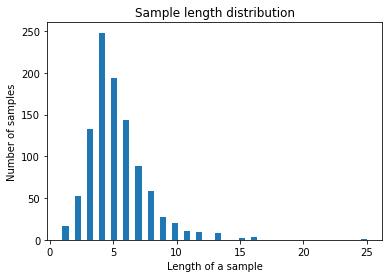

In [7]:
import matplotlib.pyplot as plt

plt.hist([len(sent_tokenize(s)) for s in df_train['answer']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [8]:
sen5 = sen10 = sen15 = sen20 = 0
for text in df_train['answer']:
  if len(sent_tokenize(text)) < 5:
    sen5 += 1
  elif len(sent_tokenize(text)) >= 5 and len(sent_tokenize(text)) < 10:
    sen10 += 1
  elif len(sent_tokenize(text)) >= 10 and len(sent_tokenize(text)) < 15:
    sen15 += 1
  else:
    sen20 += 1

In [9]:
leng = len(df_train)
numdict = {
  "<5": sen5,
  "[5:10)": sen10,
  "[10:15)": sen15,
  "[15:~)": sen20,
}
for key in numdict:
  print(key, ':', numdict[key])

<5 : 451
[5:10) : 512
[10:15) : 47
[15:~) : 6


In [10]:
leng = len(df_train)
thisdict = {
  "<5": sen5/leng*100,
  "[5:10)": sen10/leng*100,
  "[10:15)": sen15/leng*100,
  "[15:~)": sen20/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<5 : 44.389763779527556
[5:10) : 50.39370078740157
[10:15) : 4.625984251968504
[15:~) : 0.5905511811023622


### Long question


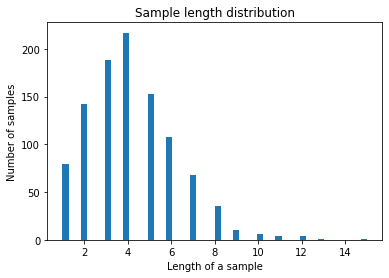

In [11]:
import matplotlib.pyplot as plt

plt.hist([len(sent_tokenize(s)) for s in df_train['long_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [12]:
sen5 = sen10 = sen15 = sen20 = 0
for text in df_train['long_question']:
  if len(sent_tokenize(text)) < 5:
    sen5 += 1
  elif len(sent_tokenize(text)) >= 5 and len(sent_tokenize(text)) < 10:
    sen10 += 1
  elif len(sent_tokenize(text)) >= 10 and len(sent_tokenize(text)) < 15:
    sen15 += 1
  else:
    sen20 += 1

In [13]:
leng = len(df_train)
numdict = {
  "<5": sen5,
  "[5:10)": sen10,
  "[10:15)": sen15,
  "[15:~)": sen20,
}
for key in numdict:
  print(key, ':', numdict[key])

<5 : 626
[5:10) : 374
[10:15) : 15
[15:~) : 1


In [14]:
leng = len(df_train)
thisdict = {
  "<5": sen5/leng*100,
  "[5:10)": sen10/leng*100,
  "[10:15)": sen15/leng*100,
  "[15:~)": sen20/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<5 : 61.61417322834646
[5:10) : 36.811023622047244
[10:15) : 1.4763779527559056
[15:~) : 0.09842519685039369


## Number of documents by word length

### Answer

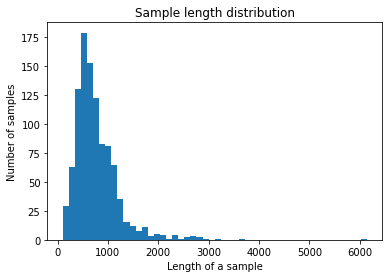

In [15]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in df_train['answer']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [16]:
count100 = count300 = count500 = count700 = count1000 = count10000 = 0
for s in df_train['answer']:
  if (len(str(s)) < 100):
    count100 += 1
  elif (len(str(s)) >= 100 and len(str(s)) < 300):
    count300 += 1
  elif (len(str(s)) >= 300 and len(str(s)) < 500):
    count500 += 1
  elif (len(str(s)) >= 500 and len(str(s)) < 700):
    count700 += 1
  elif (len(str(s)) >= 700 and len(str(s)) < 1000):
    count1000 += 1
  else:
    count10000 += 1

In [17]:
leng = len(df_train)
numdict = {
  "<100": count100,
  "[100:300)": count300,
  "[300:500)": count500,
  "[500:700)": count700,
  "[700:1000)": count1000,
  "[1000:~)": count10000,
}
for key in numdict:
  print(key, ':', numdict[key])

<100 : 0
[100:300) : 61
[300:500) : 212
[500:700) : 277
[700:1000) : 251
[1000:~) : 215


In [18]:
leng = len(df_train)
thisdict = {
  "<100": count100/leng*100,
  "[100:300)": count300/leng*100,
  "[300:500)": count500/leng*100,
  "[500:700)": count700/leng*100,
  "[700:1000)": count1000/leng*100,
  "[1000:~)": count10000/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<100 : 0.0
[100:300) : 6.003937007874016
[300:500) : 20.866141732283463
[500:700) : 27.263779527559056
[700:1000) : 24.70472440944882
[1000:~) : 21.161417322834648


### Long question

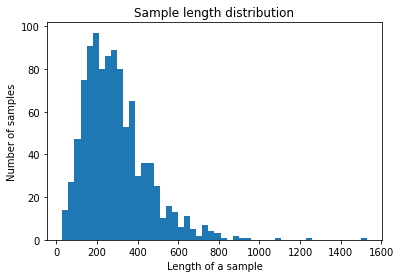

In [19]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in df_train['long_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [20]:
count100 = count300 = count500 = count700 = count1000 = count10000 = 0
for s in df_train['long_question']:
  if (len(str(s)) < 100):
    count100 += 1
  elif (len(str(s)) > 100 and len(str(s)) < 300):
    count300 += 1
  elif (len(str(s)) > 300 and len(str(s)) < 500):
    count500 += 1
  elif (len(str(s)) > 500 and len(str(s)) < 700):
    count700 += 1
  elif (len(str(s)) > 700 and len(str(s)) < 1000):
    count1000 += 1
  else:
    count10000 += 1

In [21]:
leng = len(df_train)
numdict = {
  "<100": count100,
  "[100:300)": count300,
  "[300:500)": count500,
  "[500:700)": count700,
  "[700:1000)": count1000,
  "[1000:~)": count10000,
}
for key in numdict:
  print(key, ':', numdict[key])

<100 : 55
[100:300) : 553
[300:500) : 308
[500:700) : 69
[700:1000) : 20
[1000:~) : 11


In [22]:
leng = len(df_train)
thisdict = {
  "<100": count100/leng*100,
  "(100:300)": count300/leng*100,
  "(300:500)": count500/leng*100,
  "(500:700)": count700/leng*100,
  "(700:1000)": count1000/leng*100,
  "(1000:~)": count10000/leng*100,
}
for key in thisdict:
  print(key, ':', thisdict[key])

<100 : 5.413385826771654
(100:300) : 54.42913385826772
(300:500) : 30.314960629921263
(500:700) : 6.791338582677166
(700:1000) : 1.968503937007874
(1000:~) : 1.0826771653543308


# Preprocessing

In [23]:
# important
for i in range(len(df_train)):
  begin = 0
  end = 0
  if (type(df_train['answer'][i])== str):
    for j in range(len(df_train['answer'][i])):
        if df_train['answer'][i][j] == '“':
          begin = j
        if df_train['answer'][i][j] == '”':
          end = j
    if begin!=0 and end!=0:
      df_train['answer'][i] = df_train['answer'][i].replace(df_train['answer'][i][begin:end+2],"")


In [24]:
df_train = df_train[df_train.answer != 'None']
df_train = df_train[df_train.answer != 'none']
df_train = df_train[df_train.answer != ' ']
df_train = df_train[df_train.answer != '']

df_test = df_test[df_test.answer != 'None']
df_test = df_test[df_test.answer != 'none']
df_test = df_test[df_test.answer != ' ']
df_test = df_test[df_test.answer != '']

df_val = df_val[df_val.answer != 'None']
df_val = df_val[df_val.answer != 'none']
df_val = df_val[df_val.answer != ' ']
df_val = df_val[df_val.answer != '']

In [25]:
df_train.tail()

,short_question,long_question,answer,link
1011,None,"Tôi có tiền sử tiểu cầu thấp, PLT 130.000-140....","Chào anh,Tình trạng tiểu cầu của anh dưới ngưỡ...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1012,None,"Tôi bị huyết áp cao phải uống thuốc hàng ngày,...","Chào anh,\nViệc uống thuốc huyết áp duy trì hà...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1013,None,Vaccine AstraZeneca tôi thấy ở nước ngoài chỉ ...,"Chào bạn,\nTheo thông tin kê toa của nhà sản x...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1014,None,"Em 33 tuổi, cao 1,68 m, nặng 90 kg, bị dị ứng ...","Chào Anh/Chị,\nTheo mô tả thì trường hợp dị ứn...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
1015,None,"Tôi thỉnh thoảng bị dị ứng ngứa nổi mẩn, đặc b...","Chào anh,\nTheo hướng dẫn của Bộ Y tế, anh thu...",https://vnexpress.net/tu-van-tiem-vaccine-covi...


In [26]:
# short_question
for i in range(len(df_train)):
  df_train['short_question'][i] = df_train['short_question'][i].strip()
  df_train['short_question'][i] = df_train['short_question'][i].lower()
  df_train['short_question'][i] = df_train['short_question'][i].replace("\n", "")
  df_train['short_question'][i] = re.sub(r'[^\w\s]','', df_train['short_question'][i])
  # long_question
  df_train['long_question'][i] = df_train['long_question'][i].strip()
  df_train['long_question'][i] = df_train['long_question'][i].lower()
  df_train['long_question'][i] = df_train['long_question'][i].replace("\n", "")
  df_train['long_question'][i] = re.sub(r'[^\w\s]','', df_train['long_question'][i])
  # answer
  df_train['answer'][i] = df_train['answer'][i].strip()
  df_train['answer'][i] = df_train['answer'][i].lower()
  df_train['answer'][i] = df_train['answer'][i].replace("\n", "")
  df_train['answer'][i] = re.sub(r'[^\w\s]','', df_train['answer'][i])


In [27]:
df_train = df_train.dropna()
df_train = df_train.drop_duplicates()
df_test = df_test.dropna()
df_test = df_test.drop_duplicates()
df_val = df_val.dropna()
df_val = df_val.drop_duplicates()

In [28]:
len(df_train)

1016

### Tokenize

In [29]:
pip install pyvi


     |████████████████████████████████| 8.5 MB 2.9 MB/s 


In [30]:
from pyvi import ViTokenizer
df_train["long_tokenize"] = ""
df_train["answer_tokenize"] = ""
for i in range(len(df_train["long_question"])):
  try:
    df_train["long_tokenize"][i] = ViTokenizer.tokenize(str(df_train["long_question"][i]))
  except:
    print('..')
for i in range(len(df_train["answer"])):
  try:
    df_train["answer_tokenize"][i] = ViTokenizer.tokenize(str(df_train["answer"][i]))
  except:
    print('..')

In [31]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,bìu dương vật sưng to cứng và tinh hoàn không ...,xin chào bác sĩ cho em hỏi bìu dương vật sưng ...,chào em với câu hỏi bìu dương vật sưng to cứng...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,xin chào bác_sĩ cho em hỏi bìu dương_vật sưng ...,chào em với câu hỏi bìu dương_vật sưng to cứng...
1,trẻ sơ sinh vàng da vàng mắt mức độ nhẹ có đán...,em chào bác sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình trạng rất phổ biến ở ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,em chào bác_sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình_trạng rất phổ_biến ở ...
2,bị đau mắt đỏ nhỏ thuốc mỡ chlorocinah có khỏi...,chào dược sĩ con tôi bị đau mắt đỏ dược sĩ ch...,chào bạn với câu hỏi của bạn dược sĩ xin tư vấ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào dược_sĩ con tôi bị đau mắt đỏ dược_sĩ cho...,chào bạn với câu hỏi của bạn dược_sĩ xin tư_vấ...
3,tự nhiên xuất hiện vết bầm kèm xuất huyết là b...,chào bác sĩgần 2 tháng trở lại đây em có triệu...,được giải đáp bởi bác sĩ lê thị thanh hương b...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác sĩgần 2 tháng trở_lại đây em có triệu...,được giải_đáp bởi bác_sĩ lê thị thanh hương bá...
4,điều trị dứt điểm huyết khối tĩnh mạch chi như...,chào bác sĩem bị huyết khối tĩnh mạch chi dưới...,chào bạnvới câu hỏi bác sĩ xin được trả lời n...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác sĩem bị huyết khối tĩnh_mạch chi dưới...,chào bạnvới câu hỏi bác_sĩ xin được trả_lời nh...
...,...,...,...,...,...,...
1011,none,tôi có tiền sử tiểu cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu cầu của anh dưới ngưỡn...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,tôi có tiền_sử tiểu_cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu_cầu của anh dưới ngưỡn...
1012,none,tôi bị huyết áp cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết áp duy trì hàng ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,tôi bị huyết_áp_cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết_áp duy_trì hàng ...
1013,none,vaccine astrazeneca tôi thấy ở nước ngoài chỉ ...,chào bạntheo thông tin kê toa của nhà sản xuất...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,vaccine astrazeneca tôi thấy ở nước_ngoài chỉ_...,chào bạntheo thông_tin kê toa của nhà sản_xuất...
1014,none,em 33 tuổi cao 168 m nặng 90 kg bị dị ứng với ...,chào anhchịtheo mô tả thì trường hợp dị ứng củ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,em 33 tuổi cao 168 m nặng 90 kg bị dị_ứng với ...,chào anhchịtheo mô_tả thì trường_hợp dị_ứng củ...


### Write stopwords list to file

In [32]:
def get_stopwords(documents, threshold=3):
    """
    :param documents: list of documents
    :param threshold:
    :return: list of words has idf <= threshold
    """
    tfidf = TfidfVectorizer(min_df=5)
    tfidf_matrix = tfidf.fit_transform(documents)
    features = tfidf.get_feature_names()
    stopwords = []
    print(min(tfidf.idf_), max(tfidf.idf_), len(features))
    for index, feature in enumerate(features):
        if tfidf.idf_[index] <= threshold:
            stopwords.append(feature)
    return stopwords

In [33]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords

# stopwords = get_stopwords(df_train["long_tokenize"], threshold=3)
# stopwords = stopwords + get_stopwords(df_train["long_question"], threshold=3)
# stopwords = stopwords + get_stopwords(df_train["answer"], threshold=3)
# with open('stopwords.txt', 'w', encoding='utf8') as fp:
#     for word in stopwords:
#         fp.write(word + '\n')

### Read stopword file

In [34]:
for i in range(len(df_train["long_tokenize"])):
  try:
    df_train["long_tokenize"][i] = df_train["long_tokenize"][i].split(" ")
  except:
    print('ok')
for i in range(len(df_train["answer_tokenize"])):
  try:
    df_train["answer_tokenize"][i] = df_train["answer_tokenize"][i].split(" ")
  except:
    print('ok')

In [35]:
with open('/content/drive/MyDrive/QA_KLTN/Dataset/stopwords.txt') as f:
    lines = f.readlines()


In [36]:
for i in range(len(lines)):
  lines[i] = (lines[i].rstrip("\n"))

In [37]:
len(lines)

315

### Remove stopwords

In [38]:
import re
long_tokenize = ''
answer_tokenize = ''
for i in range(len(df_train["long_tokenize"])):
  try:
    for word in df_train["long_tokenize"][i]:
      #remove stopword
      if (word in lines):
        long_tokenize = [word for word in df_train["long_tokenize"][i] if word not in lines]
    df_train["long_tokenize"][i] = long_tokenize
  except: 
    print('err')
for i in range(len(df_train["answer_tokenize"])):
  try:
    for word in df_train["answer_tokenize"][i]:
      #remove stopword
      if (word in lines):
        answer_tokenize = [word for word in df_train["answer_tokenize"][i] if word not in lines]  
    df_train["answer_tokenize"][i] = answer_tokenize 
  except: 
    print('err')

In [ ]:
lines

In [40]:
df_train.tail()

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
1011,none,tôi có tiền sử tiểu cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu cầu của anh dưới ngưỡn...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[tiền_sử, tiểu_cầu, thấp, plt, 130000140000, c...","[anhtình, tiểu_cầu, anh, dưới, ngưỡng, 150, mứ..."
1012,none,tôi bị huyết áp cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết áp duy trì hàng ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,[huyết_áp_cao],"[anhviệc, huyết_áp, duy_trì, cần_thiết, bệnh_l..."
1013,none,vaccine astrazeneca tôi thấy ở nước ngoài chỉ ...,chào bạntheo thông tin kê toa của nhà sản xuất...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[astrazeneca, ở, nước_ngoài, chỉ_định, chích, ...","[bạntheo, thông_tin, kê, toa, nhà, sản_xuất, h..."
1014,none,em 33 tuổi cao 168 m nặng 90 kg bị dị ứng với ...,chào anhchịtheo mô tả thì trường hợp dị ứng củ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[33, cao, 168, m, nặng, 90, kg, dị_ứng, con, h...","[anhchịtheo, mô_tả, trường_hợp, dị_ứng, anhchị..."
1015,none,tôi thỉnh thoảng bị dị ứng ngứa nổi mẩn đặc bi...,chào anhtheo hướng dẫn của bộ y tế anh thuộc đ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[thỉnh_thoảng, dị_ứng, ngứa, nổi, mẩn, đặc_biệ...","[anhtheo, hướng_dẫn, y_tế, anh, đối_tượng, cẩn..."


In [41]:
# df_train.to_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Preprocessed data/Preprocessed_val.csv', index=False, header=True)


# Data visualization

### Word_cloudcloud

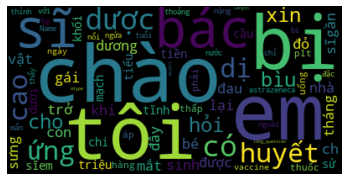

In [42]:
# Start with one review:
from wordcloud import WordCloud 

text = df_train.long_question	

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word_cloud after removing stopwords

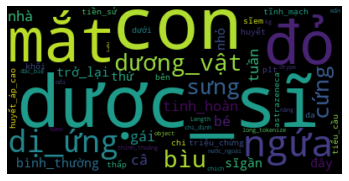

In [43]:
from wordcloud import WordCloud 

# Start with one review:
text = df_train.long_tokenize

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Models

In [44]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,bìu dương vật sưng to cứng và tinh hoàn không ...,xin chào bác sĩ cho em hỏi bìu dương vật sưng ...,chào em với câu hỏi bìu dương vật sưng to cứng...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[bìu, dương_vật, sưng, to, cứng, tinh_hoàn, câ...","[bìu, dương_vật, sưng, to, cứng, tinh_hoàn, câ..."
1,trẻ sơ sinh vàng da vàng mắt mức độ nhẹ có đán...,em chào bác sĩ bé gái nhà em khi sinh được 36 ...,chào bạn vàng da là tình trạng rất phổ biến ở ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[bé, gái, nhà, 36, tuần, 2, bình_thường, thứ, ...","[vàng, da, tình_trạng, phổ_biến, ở, trẻ, sơ_si..."
2,bị đau mắt đỏ nhỏ thuốc mỡ chlorocinah có khỏi...,chào dược sĩ con tôi bị đau mắt đỏ dược sĩ ch...,chào bạn với câu hỏi của bạn dược sĩ xin tư vấ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[dược_sĩ, con, mắt, đỏ, dược_sĩ, mắt, đỏ, nhỏ,...","[dược_sĩ, sauthuốc, mỡ, mắt, chlorocinah, chứa..."
3,tự nhiên xuất hiện vết bầm kèm xuất huyết là b...,chào bác sĩgần 2 tháng trở lại đây em có triệu...,được giải đáp bởi bác sĩ lê thị thanh hương b...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩgần, 2, trở_lại, đây, triệu_chứng, ngứa, da...","[giải_đáp, lê, thanh, hương, hồi_sức, cấp_cứu,..."
4,điều trị dứt điểm huyết khối tĩnh mạch chi như...,chào bác sĩem bị huyết khối tĩnh mạch chi dưới...,chào bạnvới câu hỏi bác sĩ xin được trả lời n...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩem, huyết, khối, tĩnh_mạch, chi, dưới, bên,...","[trả_lời, saubạn, trẻ, huyết, khối, tĩnh_mạch,..."
...,...,...,...,...,...,...
1011,none,tôi có tiền sử tiểu cầu thấp plt 130000140000 ...,chào anhtình trạng tiểu cầu của anh dưới ngưỡn...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[tiền_sử, tiểu_cầu, thấp, plt, 130000140000, c...","[anhtình, tiểu_cầu, anh, dưới, ngưỡng, 150, mứ..."
1012,none,tôi bị huyết áp cao phải uống thuốc hàng ngày ...,chào anhviệc uống thuốc huyết áp duy trì hàng ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,[huyết_áp_cao],"[anhviệc, huyết_áp, duy_trì, cần_thiết, bệnh_l..."
1013,none,vaccine astrazeneca tôi thấy ở nước ngoài chỉ ...,chào bạntheo thông tin kê toa của nhà sản xuất...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[astrazeneca, ở, nước_ngoài, chỉ_định, chích, ...","[bạntheo, thông_tin, kê, toa, nhà, sản_xuất, h..."
1014,none,em 33 tuổi cao 168 m nặng 90 kg bị dị ứng với ...,chào anhchịtheo mô tả thì trường hợp dị ứng củ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,"[33, cao, 168, m, nặng, 90, kg, dị_ứng, con, h...","[anhchịtheo, mô_tả, trường_hợp, dị_ứng, anhchị..."


## BM25

In [45]:
!pip install rank_bm25

In [46]:
from rank_bm25 import BM25Okapi
import numpy as np

bm25_index = BM25Okapi(df_train.long_tokenize)

def search(search_string, num_results=10):
    search_tokens = ViTokenizer.tokenize(search_string)
    search_tokens = search_tokens.split()
    scores = bm25_index.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    return top_indexes

indexes = search('mất khứu giác sau gãy sống mũi vỡ xương trán có ngửi lại được không')
indexes

array([549, 711, 201,  69, 309, 273,  64, 233, 636, 592])

In [47]:
df_train['short_question'][549]

'mất khứu giác sau gãy sống mũi vỡ xương trán có ngửi lại được không'

In [48]:
for i in indexes:
  print('<', df_train['answer'][i])

< chào em mất khứu giác sau chấn thương 1 năm tốt nhất em nên khám chuyên khoa tai  mũi  họng tại bệnh viện thuộc hệ thống y tế vinmec để được chỉ định nội soi chụp phim đánh giá bệnh lý như thế nào từ đó mới có thể đưa ra hướng điều trị phù hợp cho em đượcrất mong có thể sớm gặp em tại vinmec để có những trao đổi cụ thể chúc em luôn có sức khỏe tốt trân trọng
< được giải đáp bởi thạc sĩ bác sĩ vũ song linh  bác sĩ khoa ngoại chấn thương chỉnh hình  khoa ngoại tổng hợp bệnh viện đa khoa quốc tế vinmec times citychào bạnvới câu hỏi  bác sĩ xin giải đáp như saubạn không nói rõ lồi cầu trong xương đùi hay cánh tay vì thế bác sĩ chưa thể tư vấn chính xác cho bạn được xương cố định 2 tháng chưa liền vững cánh tay 3 tháng còn đùi phải 6 tháng ngoài ra còn đánh giá tình trạng cal xương từng thời điểm việc thực hiện một số bài tập phục hồi chức năng gãy lồi cầu xương cần được chú trọng song song với quá trình tái cố định xương nguyên tắc của phục hồi chức năng gãy lồi cầu xương là tạo điều kiệ